In [ ]:
# %%

import torch
from util.gpu_info import gpuInfo
from util.data_augmentation import data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import test
from util.data_load import data_load

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *
from networks.DLinkNet152 import *
from networks.LinkNet152 import *

training_data_processing = False
model_training = True
model_validation = True
model_loading = False

batch_size = 4

path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/LinkNet152.model"

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

gpu_info = gpuInfo()

model = LinkNet152()
if cuda_available:
    model.cuda()

print(model)

Tue Jan 21 08:34:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   42C    P0             39W /  340W |     473MiB /  16376MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


LinkNet152(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256,

In [ ]:
# %%

if training_data_processing:
    training_resize = 512
    training_number = 367
    testing_resize = int(608 * training_resize / 400)
    if testing_resize % 2 == 1:
        testing_resize += 1

    data_augmentation(
        training_resize,
        training_number,
        testing_resize,
    )

In [ ]:
# %%

if not model_loading:
    training_generator, validation_generator = data_load(
        path_data, model_validation, batch_size
    )


 Fim do Carregamento Training Data

 Fim do Carregamento Validation Data

 Fim do Carregamento


/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.39461618661880493
→ ACC for Batch 1: 0.06312179565429688
→ Recall for Batch 1: 0.958017459223524
→ Running_loss for Batch 21: 0.39237114787101746
→ ACC for Batch 21: 0.978938102722168
→ Recall for Batch 21: 0.0021317021177997128
→ Running_loss for Batch 41: 0.377864807844162
→ ACC for Batch 41: 0.9852313995361328
→ Recall for Batch 41: 0.0027168639627401514
→ Running_loss for Batch 61: 0.2828783392906189
→ ACC for Batch 61: 0.9653053283691406
→ Recall for Batch 61: 0.0
→ Running_loss for Batch 81: 0.32647034525871277
→ ACC for Batch 81: 0.9726591110229492
→ Recall for Batch 81: 0.7562522436280962
→ Running_loss for Batch 101: 0.2963331937789917
→ ACC for Batch 101: 0.9813480377197266
→ Recall for Batch 101: 0.6704683556137234
→ Running_loss for Batch 121: 0.29883313179016113
→ ACC for Batch 121: 0.9759483337402344
→ Recall for Batch 121: 0.43940133865732095
→ Running_loss for Batch 141: 0.25375133752822876


  1%|          | 1/100 [08:31<14:04:29, 511.81s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.15275441110134125
→ ACC for Batch 1: 0.9871063232421875
→ Recall for Batch 1: 0.7772717644566829
→ Running_loss for Batch 21: 0.15338408946990967
→ ACC for Batch 21: 0.9864301681518555
→ Recall for Batch 21: 0.7587816586657838
→ Running_loss for Batch 41: 0.1898348480463028
→ ACC for Batch 41: 0.9664115905761719
→ Recall for Batch 41: 0.5921016918483669
→ Running_loss for Batch 61: 0.19848421216011047
→ ACC for Batch 61: 0.9789800643920898
→ Recall for Batch 61: 0.6764121401902926
→ Running_loss for Batch 81: 0.1938246786594391
→ ACC for Batch 81: 0.9794454574584961
→ Recall for Batch 81: 0.5829424739497503
→ Running_loss for Batch 101: 0.1937788724899292
→ ACC for Batch 101: 0.9844474792480469
→ Recall for Batch 101: 0.8001007972143316
→ Running_loss for Batch 121: 0.28235459327697754
→ ACC for Batch 121: 0.9836950302124023
→ Recall for Batch 121: 0.6251079260922121
→ Running_loss for Batch 141: 0.28567445

  2%|▏         | 2/100 [16:39<13:32:29, 497.44s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.21405409276485443
→ ACC for Batch 1: 0.9953346252441406
→ Recall for Batch 1: 0.6588469794541552
→ Running_loss for Batch 21: 0.15205325186252594
→ ACC for Batch 21: 0.9833850860595703
→ Recall for Batch 21: 0.7914737921667544
→ Running_loss for Batch 41: 0.22225750982761383
→ ACC for Batch 41: 0.9846525192260742
→ Recall for Batch 41: 0.7621120146604055
→ Running_loss for Batch 61: 0.14053282141685486
→ ACC for Batch 61: 0.9782209396362305
→ Recall for Batch 61: 0.7853395376429803
→ Running_loss for Batch 81: 0.18077608942985535
→ ACC for Batch 81: 0.9844627380371094
→ Recall for Batch 81: 0.6718158464034614
→ Running_loss for Batch 101: 0.1833530217409134
→ ACC for Batch 101: 0.9813413619995117
→ Recall for Batch 101: 0.8064615807182586
→ Running_loss for Batch 121: 0.17906466126441956
→ ACC for Batch 121: 0.9792823791503906
→ Recall for Batch 121: 0.7339461944031364
→ Running_loss for Batch 141: 0.147067

  3%|▎         | 3/100 [24:28<13:03:44, 484.79s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.16649843752384186
→ ACC for Batch 1: 0.9758844375610352
→ Recall for Batch 1: 0.740607604297188
→ Running_loss for Batch 21: 0.165155291557312
→ ACC for Batch 21: 0.9728221893310547
→ Recall for Batch 21: 0.7633131743901767
→ Running_loss for Batch 41: 0.19970814883708954
→ ACC for Batch 41: 0.9830284118652344
→ Recall for Batch 41: 0.8293509272467903
→ Running_loss for Batch 61: 0.13729703426361084
→ ACC for Batch 61: 0.9851169586181641
→ Recall for Batch 61: 0.7856880926187857
→ Running_loss for Batch 81: 0.12775041162967682
→ ACC for Batch 81: 0.9853353500366211
→ Recall for Batch 81: 0.8588140274086812
→ Running_loss for Batch 101: 0.1606418341398239
→ ACC for Batch 101: 0.9886093139648438
→ Recall for Batch 101: 0.6987673645079241
→ Running_loss for Batch 121: 0.14885306358337402
→ ACC for Batch 121: 0.9940147399902344
→ Recall for Batch 121: 0.7804180418041804
→ Running_loss for Batch 141: 0.160063952

  4%|▍         | 4/100 [32:19<12:46:38, 479.15s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.12395074218511581
→ ACC for Batch 1: 0.9872894287109375
→ Recall for Batch 1: 0.8298204092997354
→ Running_loss for Batch 21: 0.16430850327014923
→ ACC for Batch 21: 0.9876127243041992
→ Recall for Batch 21: 0.7784232365145228
→ Running_loss for Batch 41: 0.12003745883703232
→ ACC for Batch 41: 0.9911565780639648
→ Recall for Batch 41: 0.8487822041518434
→ Running_loss for Batch 61: 0.16019979119300842
→ ACC for Batch 61: 0.990941047668457
→ Recall for Batch 61: 0.8143166533682891
→ Running_loss for Batch 81: 0.14201855659484863
→ ACC for Batch 81: 0.9828853607177734
→ Recall for Batch 81: 0.805077327108258
→ Running_loss for Batch 101: 0.13047724962234497
→ ACC for Batch 101: 0.9824390411376953
→ Recall for Batch 101: 0.8638802912556504
→ Running_loss for Batch 121: 0.1418350785970688
→ ACC for Batch 121: 0.9804277420043945
→ Recall for Batch 121: 0.7827778122607743
→ Running_loss for Batch 141: 0.12787035

  5%|▌         | 5/100 [40:48<12:55:39, 489.89s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.13446223735809326
→ ACC for Batch 1: 0.9821987152099609
→ Recall for Batch 1: 0.7952633152522103
→ Running_loss for Batch 21: 0.12777511775493622
→ ACC for Batch 21: 0.9781608581542969
→ Recall for Batch 21: 0.763032807257363
→ Running_loss for Batch 41: 0.12053590267896652
→ ACC for Batch 41: 0.9873743057250977
→ Recall for Batch 41: 0.7897201043852019
→ Running_loss for Batch 61: 0.13553863763809204
→ ACC for Batch 61: 0.9893655776977539
→ Recall for Batch 61: 0.7716040666478396
→ Running_loss for Batch 81: 0.16783112287521362
→ ACC for Batch 81: 0.9873170852661133
→ Recall for Batch 81: 0.7417234468937876
→ Running_loss for Batch 101: 0.11914242058992386
→ ACC for Batch 101: 0.9888763427734375
→ Recall for Batch 101: 0.7968948401246682
→ Running_loss for Batch 121: 0.14824585616588593
→ ACC for Batch 121: 0.9919185638427734
→ Recall for Batch 121: 0.7488975356679637
→ Running_loss for Batch 141: 0.176552

  6%|▌         | 6/100 [49:27<13:03:16, 499.96s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.13150206208229065
→ ACC for Batch 1: 0.9929933547973633
→ Recall for Batch 1: 0.805893383337798
→ Running_loss for Batch 21: 0.11166080087423325
→ ACC for Batch 21: 0.9875040054321289
→ Recall for Batch 21: 0.8559134928997942
→ Running_loss for Batch 41: 0.13137105107307434
→ ACC for Batch 41: 0.9904346466064453
→ Recall for Batch 41: 0.7931140960321136
→ Running_loss for Batch 61: 0.13936538994312286
→ ACC for Batch 61: 0.985255241394043
→ Recall for Batch 61: 0.7910540877773559
→ Running_loss for Batch 81: 0.11168572306632996
→ ACC for Batch 81: 0.9932527542114258
→ Recall for Batch 81: 0.8408088235294118
→ Running_loss for Batch 101: 0.14704418182373047
→ ACC for Batch 101: 0.9888820648193359
→ Recall for Batch 101: 0.7323055616298564
→ Running_loss for Batch 121: 0.1379762589931488
→ ACC for Batch 121: 0.9881649017333984
→ Recall for Batch 121: 0.8295787418049937
→ Running_loss for Batch 141: 0.15546041

  7%|▋         | 7/100 [59:12<13:37:55, 527.70s/it]

Validation loss for Epoch 7: 0.14122360944747925

Acurácia de validação:  0.9866270556741831
F1-score de validação:  0.7347056512329451
IoU de validação:  0.976360181480665
Recall de validação:  0.7560724916525893

---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.1486687958240509
→ ACC for Batch 1: 0.983027458190918
→ Recall for Batch 1: 0.7591538442417162
→ Running_loss for Batch 21: 0.12675774097442627
→ ACC for Batch 21: 0.9940385818481445
→ Recall for Batch 21: 0.8140655105973025
→ Running_loss for Batch 41: 0.1458287537097931
→ ACC for Batch 41: 0.9924430847167969
→ Recall for Batch 41: 0.7412523515184091
→ Running_loss for Batch 61: 0.11312606185674667
→ ACC for Batch 61: 0.9898233413696289
→ Recall for Batch 61: 0.8266763937017448
→ Running_loss for Batch 81: 0.11321225017309189
→ ACC for Batch 81: 0.9832601547241211
→ Recall for Batch 81: 0.8279642837498395
→ Running_loss for Batch 101: 0.10995670408010483
→ ACC for Batch 101: 0.989593505859375
→ R

  8%|▊         | 8/100 [1:09:04<14:00:32, 548.18s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.09557786583900452
→ ACC for Batch 1: 0.9899139404296875
→ Recall for Batch 1: 0.8952473838205446
→ Running_loss for Batch 21: 0.10567764937877655
→ ACC for Batch 21: 0.9896030426025391
→ Recall for Batch 21: 0.9168230143839899
→ Running_loss for Batch 41: 0.11819882690906525
→ ACC for Batch 41: 0.9885034561157227
→ Recall for Batch 41: 0.8356879252681352
→ Running_loss for Batch 61: 0.12036046385765076
→ ACC for Batch 61: 0.9809646606445312
→ Recall for Batch 61: 0.8010653868409409
→ Running_loss for Batch 81: 0.1322123259305954
→ ACC for Batch 81: 0.9915847778320312
→ Recall for Batch 81: 0.819880316111644
→ Running_loss for Batch 101: 0.09739939868450165
→ ACC for Batch 101: 0.9872283935546875
→ Recall for Batch 101: 0.860779764715544
→ Running_loss for Batch 121: 0.10704321414232254
→ ACC for Batch 121: 0.9909963607788086
→ Recall for Batch 121: 0.8575388575388575
→ Running_loss for Batch 141: 0.10377456

  9%|▉         | 9/100 [1:17:46<13:39:06, 540.07s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.0925244465470314
→ ACC for Batch 1: 0.9928922653198242
→ Recall for Batch 1: 0.8884399470804877
→ Running_loss for Batch 21: 0.14111490547657013
→ ACC for Batch 21: 0.984130859375
→ Recall for Batch 21: 0.8413203577064703
→ Running_loss for Batch 41: 0.14258089661598206
→ ACC for Batch 41: 0.994145393371582
→ Recall for Batch 41: 0.8349733343348607
→ Running_loss for Batch 61: 0.13327640295028687
→ ACC for Batch 61: 0.9921941757202148
→ Recall for Batch 61: 0.8074579935147882
→ Running_loss for Batch 81: 0.12221059203147888
→ ACC for Batch 81: 0.9859714508056641
→ Recall for Batch 81: 0.8280268784361637
→ Running_loss for Batch 101: 0.12774404883384705
→ ACC for Batch 101: 0.9881515502929688
→ Recall for Batch 101: 0.833172041332376
→ Running_loss for Batch 121: 0.10611219704151154
→ ACC for Batch 121: 0.9929523468017578
→ Recall for Batch 121: 0.8632751734286315
→ Running_loss for Batch 141: 0.10975331068

 10%|█         | 10/100 [1:27:18<13:44:31, 549.68s/it]

Validation loss for Epoch 10: 0.13050808012485504

Acurácia de validação:  0.987652565751757
F1-score de validação:  0.7556831923289169
IoU de validação:  0.9780276996776197
Recall de validação:  0.7755562361986565

---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.11744964867830276
→ ACC for Batch 1: 0.9940519332885742
→ Recall for Batch 1: 0.8624314442413162
→ Running_loss for Batch 21: 0.12226316332817078
→ ACC for Batch 21: 0.9844264984130859
→ Recall for Batch 21: 0.8242814992896951
→ Running_loss for Batch 41: 0.08470854163169861
→ ACC for Batch 41: 0.9862146377563477
→ Recall for Batch 41: 0.9061465094714531
→ Running_loss for Batch 61: 0.1250467151403427
→ ACC for Batch 61: 0.9935331344604492
→ Recall for Batch 61: 0.8559550432937668
→ Running_loss for Batch 81: 0.11673238128423691
→ ACC for Batch 81: 0.9911212921142578
→ Recall for Batch 81: 0.8456383335194907
→ Running_loss for Batch 101: 0.09161492437124252
→ ACC for Batch 101: 0.989313125610351

 11%|█         | 11/100 [1:35:20<13:04:57, 529.18s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.10161805897951126
→ ACC for Batch 1: 0.9860801696777344
→ Recall for Batch 1: 0.9024926686217009
→ Running_loss for Batch 21: 0.09626123309135437
→ ACC for Batch 21: 0.9848289489746094
→ Recall for Batch 21: 0.8755622445314771
→ Running_loss for Batch 41: 0.1138797253370285
→ ACC for Batch 41: 0.9955921173095703
→ Recall for Batch 41: 0.9216834111225378
→ Running_loss for Batch 61: 0.0907852053642273
→ ACC for Batch 61: 0.9940872192382812
→ Recall for Batch 61: 0.8649797653599314
→ Running_loss for Batch 81: 0.08739747852087021
→ ACC for Batch 81: 0.9912605285644531
→ Recall for Batch 81: 0.8937759787008612
→ Running_loss for Batch 101: 0.0978209599852562
→ ACC for Batch 101: 0.9872350692749023
→ Recall for Batch 101: 0.8701018076044047
→ Running_loss for Batch 121: 0.11865387856960297
→ ACC for Batch 121: 0.9862194061279297
→ Recall for Batch 121: 0.8490366343540279
→ Running_loss for Batch 141: 0.0919339

 12%|█▏        | 12/100 [1:45:01<13:19:17, 544.97s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.10465214401483536
→ ACC for Batch 1: 0.9915714263916016
→ Recall for Batch 1: 0.8596515297022911
→ Running_loss for Batch 21: 0.10526524484157562
→ ACC for Batch 21: 0.9937047958374023
→ Recall for Batch 21: 0.8402337379960138
→ Running_loss for Batch 41: 0.10661645233631134
→ ACC for Batch 41: 0.9962062835693359
→ Recall for Batch 41: 0.8614273376776321
→ Running_loss for Batch 61: 0.1322334110736847
→ ACC for Batch 61: 0.9938135147094727
→ Recall for Batch 61: 0.7835315101070155
→ Running_loss for Batch 81: 0.09765926003456116
→ ACC for Batch 81: 0.9859437942504883
→ Recall for Batch 81: 0.841609119807081
→ Running_loss for Batch 101: 0.12565375864505768
→ ACC for Batch 101: 0.9955224990844727
→ Recall for Batch 101: 0.8153723616089208
→ Running_loss for Batch 121: 0.08807176351547241
→ ACC for Batch 121: 0.9879350662231445
→ Recall for Batch 121: 0.8901454909583554
→ Running_loss for Batch 141: 0.116489

 13%|█▎        | 13/100 [1:54:43<13:26:09, 555.98s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.11801311373710632
→ ACC for Batch 1: 0.991180419921875
→ Recall for Batch 1: 0.8695873065499453
→ Running_loss for Batch 21: 0.0951087698340416
→ ACC for Batch 21: 0.9913511276245117
→ Recall for Batch 21: 0.8704321907600596
→ Running_loss for Batch 41: 0.1250799298286438
→ ACC for Batch 41: 0.9940910339355469
→ Recall for Batch 41: 0.826173645096973
→ Running_loss for Batch 61: 0.11323234438896179
→ ACC for Batch 61: 0.9931621551513672
→ Recall for Batch 61: 0.8066131820398031
→ Running_loss for Batch 81: 0.13215336203575134
→ ACC for Batch 81: 0.9909095764160156
→ Recall for Batch 81: 0.8344393543691399
→ Running_loss for Batch 101: 0.08416271954774857
→ ACC for Batch 101: 0.9919443130493164
→ Recall for Batch 101: 0.8834563516288362
→ Running_loss for Batch 121: 0.09956833720207214
→ ACC for Batch 121: 0.9916515350341797
→ Recall for Batch 121: 0.8498383120417508
→ Running_loss for Batch 141: 0.10973279

 14%|█▍        | 14/100 [2:04:16<13:24:23, 561.21s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.0855162963271141
→ ACC for Batch 1: 0.9966983795166016
→ Recall for Batch 1: 0.8833114686183802
→ Running_loss for Batch 21: 0.12121898680925369
→ ACC for Batch 21: 0.9961271286010742
→ Recall for Batch 21: 0.8047479786685017
→ Running_loss for Batch 41: 0.08808209747076035
→ ACC for Batch 41: 0.9922809600830078
→ Recall for Batch 41: 0.899022394353
→ Running_loss for Batch 61: 0.0791853591799736
→ ACC for Batch 61: 0.9945259094238281
→ Recall for Batch 61: 0.8965820798407778
→ Running_loss for Batch 81: 0.1184033453464508
→ ACC for Batch 81: 0.9875011444091797
→ Recall for Batch 81: 0.8253876931928136
→ Running_loss for Batch 101: 0.08831590414047241
→ ACC for Batch 101: 0.9888801574707031
→ Recall for Batch 101: 0.8578615829192741
→ Running_loss for Batch 121: 0.08901997655630112
→ ACC for Batch 121: 0.9942550659179688
→ Recall for Batch 121: 0.8723931447449927
→ Running_loss for Batch 141: 0.09711024910

 15%|█▌        | 15/100 [2:13:51<13:20:51, 565.31s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.08038581907749176
→ ACC for Batch 1: 0.9922866821289062
→ Recall for Batch 1: 0.9108269538150922
→ Running_loss for Batch 21: 0.08464323729276657
→ ACC for Batch 21: 0.995610237121582
→ Recall for Batch 21: 0.894561886459253
→ Running_loss for Batch 41: 0.08880176395177841
→ ACC for Batch 41: 0.9912805557250977
→ Recall for Batch 41: 0.885899585039435
→ Running_loss for Batch 61: 0.09607928991317749
→ ACC for Batch 61: 0.9953680038452148
→ Recall for Batch 61: 0.8607722439843313
→ Running_loss for Batch 81: 0.08553500473499298
→ ACC for Batch 81: 0.9966983795166016
→ Recall for Batch 81: 0.8802097709080873
→ Running_loss for Batch 101: 0.09353082627058029
→ ACC for Batch 101: 0.9848966598510742
→ Recall for Batch 101: 0.8823539102785878
→ Running_loss for Batch 121: 0.1108873039484024
→ ACC for Batch 121: 0.9871454238891602
→ Recall for Batch 121: 0.870025055411005
→ Running_loss for Batch 141: 0.073812618

 16%|█▌        | 16/100 [2:23:29<13:16:57, 569.25s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.14411410689353943
→ ACC for Batch 1: 0.9983043670654297
→ Recall for Batch 1: 0.8397333333333333
→ Running_loss for Batch 21: 0.1067863255739212
→ ACC for Batch 21: 0.989140510559082
→ Recall for Batch 21: 0.8628221930974225
→ Running_loss for Batch 41: 0.07932914048433304
→ ACC for Batch 41: 0.9924516677856445
→ Recall for Batch 41: 0.9071287686672302
→ Running_loss for Batch 61: 0.09314363449811935
→ ACC for Batch 61: 0.9941263198852539
→ Recall for Batch 61: 0.8917667613015943
→ Running_loss for Batch 81: 0.09365042299032211
→ ACC for Batch 81: 0.9945745468139648
→ Recall for Batch 81: 0.8835405929358362
→ Running_loss for Batch 101: 0.09368376433849335
→ ACC for Batch 101: 0.9926538467407227
→ Recall for Batch 101: 0.8850671435082922
→ Running_loss for Batch 121: 0.07944916188716888
→ ACC for Batch 121: 0.9946098327636719
→ Recall for Batch 121: 0.9095302226095223
→ Running_loss for Batch 141: 0.097479

 17%|█▋        | 17/100 [2:32:00<12:43:18, 551.79s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.0843055248260498
→ ACC for Batch 1: 0.9871492385864258
→ Recall for Batch 1: 0.8989785728051579
→ Running_loss for Batch 21: 0.10351692885160446
→ ACC for Batch 21: 0.9937934875488281
→ Recall for Batch 21: 0.8363327065986211
→ Running_loss for Batch 41: 0.10289579629898071
→ ACC for Batch 41: 0.9932680130004883
→ Recall for Batch 41: 0.8431437298769917
→ Running_loss for Batch 61: 0.07869885116815567
→ ACC for Batch 61: 0.9968090057373047
→ Recall for Batch 61: 0.8950359242325278
→ Running_loss for Batch 81: 0.06945157051086426
→ ACC for Batch 81: 0.9918346405029297
→ Recall for Batch 81: 0.9216505028735632
→ Running_loss for Batch 101: 0.0859408751130104
→ ACC for Batch 101: 0.994175910949707
→ Recall for Batch 101: 0.8919306063982174
→ Running_loss for Batch 121: 0.09532726556062698
→ ACC for Batch 121: 0.9951887130737305
→ Recall for Batch 121: 0.8450475891643133
→ Running_loss for Batch 141: 0.0734930

 18%|█▊        | 18/100 [2:39:30<11:52:19, 521.22s/it]

Validation loss for Epoch 18: 0.11098377406597137

Acurácia de validação:  0.9893386666736905
F1-score de validação:  0.7899834032678898
IoU de validação:  0.9808355725000195
Recall de validação:  0.8117135832178275

---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.0954766795039177
→ ACC for Batch 1: 0.9940319061279297
→ Recall for Batch 1: 0.8785547888004923
→ Running_loss for Batch 21: 0.10393577069044113
→ ACC for Batch 21: 0.9899873733520508
→ Recall for Batch 21: 0.8834243016841307
→ Running_loss for Batch 41: 0.07567595690488815
→ ACC for Batch 41: 0.9946861267089844
→ Recall for Batch 41: 0.8972326103216156
→ Running_loss for Batch 61: 0.08373167365789413
→ ACC for Batch 61: 0.9910650253295898
→ Recall for Batch 61: 0.8783006051624058
→ Running_loss for Batch 81: 0.08026589453220367
→ ACC for Batch 81: 0.9948549270629883
→ Recall for Batch 81: 0.8999416082749416
→ Running_loss for Batch 101: 0.07020790129899979
→ ACC for Batch 101: 0.99546146392822

 19%|█▉        | 19/100 [2:47:29<11:26:09, 508.27s/it]


---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.06879902631044388
→ ACC for Batch 1: 0.9928646087646484
→ Recall for Batch 1: 0.9152940582053355
→ Running_loss for Batch 21: 0.0854543000459671
→ ACC for Batch 21: 0.9943208694458008
→ Recall for Batch 21: 0.8923320607586711
→ Running_loss for Batch 41: 0.11527109891176224
→ ACC for Batch 41: 0.9972019195556641
→ Recall for Batch 41: 0.786309073212934
→ Running_loss for Batch 61: 0.07390965521335602
→ ACC for Batch 61: 0.9945163726806641
→ Recall for Batch 61: 0.8744964363185621
→ Running_loss for Batch 81: 0.08587568253278732
→ ACC for Batch 81: 0.9883623123168945
→ Recall for Batch 81: 0.8743404717566728
→ Running_loss for Batch 101: 0.08637525141239166
→ ACC for Batch 101: 0.9901466369628906
→ Recall for Batch 101: 0.9175426752820909
→ Running_loss for Batch 121: 0.08491410315036774
→ ACC for Batch 121: 0.9909029006958008
→ Recall for Batch 121: 0.9019400085774112
→ Running_loss for Batch 141: 0.092972

 20%|██        | 20/100 [2:55:17<11:01:44, 496.30s/it]

Validation loss for Epoch 20: 0.10802599787712097

Acurácia de validação:  0.9896196629319872
F1-score de validação:  0.7956244461575789
IoU de validação:  0.9813060347935706
Recall de validação:  0.8174157273652204

---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.08975598216056824
→ ACC for Batch 1: 0.9958934783935547
→ Recall for Batch 1: 0.8753152307782535
→ Running_loss for Batch 21: 0.08169443160295486
→ ACC for Batch 21: 0.9970579147338867
→ Recall for Batch 21: 0.8838956829232356
→ Running_loss for Batch 41: 0.08895086497068405
→ ACC for Batch 41: 0.9948577880859375
→ Recall for Batch 41: 0.905976362505383
→ Running_loss for Batch 61: 0.07203049212694168
→ ACC for Batch 61: 0.9904928207397461
→ Recall for Batch 61: 0.9022697615564079
→ Running_loss for Batch 81: 0.09121926873922348
→ ACC for Batch 81: 0.9949827194213867
→ Recall for Batch 81: 0.8520924899675139
→ Running_loss for Batch 101: 0.07139266282320023
→ ACC for Batch 101: 0.99390125274658

 21%|██        | 21/100 [3:02:53<10:37:42, 484.34s/it]


---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.09614978730678558
→ ACC for Batch 1: 0.9884357452392578
→ Recall for Batch 1: 0.8877671668940428
→ Running_loss for Batch 21: 0.07435169816017151
→ ACC for Batch 21: 0.992396354675293
→ Recall for Batch 21: 0.9007557063541024
→ Running_loss for Batch 41: 0.07576750963926315
→ ACC for Batch 41: 0.9945487976074219
→ Recall for Batch 41: 0.8808061213492834
→ Running_loss for Batch 61: 0.07459080219268799
→ ACC for Batch 61: 0.9941835403442383
→ Recall for Batch 61: 0.9059095860566448
→ Running_loss for Batch 81: 0.07036994397640228
→ ACC for Batch 81: 0.9969148635864258
→ Recall for Batch 81: 0.90583467429525
→ Running_loss for Batch 101: 0.06400939077138901
→ ACC for Batch 101: 0.9975557327270508
→ Recall for Batch 101: 0.9160673089971503
→ Running_loss for Batch 121: 0.06858837604522705
→ ACC for Batch 121: 0.9920644760131836
→ Recall for Batch 121: 0.8963784709099397
→ Running_loss for Batch 141: 0.0806293

 22%|██▏       | 22/100 [3:11:06<10:32:47, 486.76s/it]


---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.09098874032497406
→ ACC for Batch 1: 0.9893417358398438
→ Recall for Batch 1: 0.8928315329277602
→ Running_loss for Batch 21: 0.0857294574379921
→ ACC for Batch 21: 0.9941368103027344
→ Recall for Batch 21: 0.8820336600413917
→ Running_loss for Batch 41: 0.09291504323482513
→ ACC for Batch 41: 0.9943819046020508
→ Recall for Batch 41: 0.8746418338108882
→ Running_loss for Batch 61: 0.08442667126655579
→ ACC for Batch 61: 0.9961032867431641
→ Recall for Batch 61: 0.8922501898031887
→ Running_loss for Batch 81: 0.09827063977718353
→ ACC for Batch 81: 0.9892473220825195
→ Recall for Batch 81: 0.875052912029083
→ Running_loss for Batch 101: 0.07208900898694992
→ ACC for Batch 101: 0.9951696395874023
→ Recall for Batch 101: 0.9020793508368119
→ Running_loss for Batch 121: 0.08674662560224533
→ ACC for Batch 121: 0.9972858428955078
→ Recall for Batch 121: 0.8760632868322559
→ Running_loss for Batch 141: 0.110575

 23%|██▎       | 23/100 [3:20:56<11:04:22, 517.69s/it]

Validation loss for Epoch 23: 0.1042705550789833

Acurácia de validação:  0.9899683716874685
F1-score de validação:  0.8028425494528264
IoU de validação:  0.981891580465291
Recall de validação:  0.824922753405427

---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.06778459995985031
→ ACC for Batch 1: 0.9949169158935547
→ Recall for Batch 1: 0.8971359972560453
→ Running_loss for Batch 21: 0.06576815992593765
→ ACC for Batch 21: 0.9936113357543945
→ Recall for Batch 21: 0.9185388718280265
→ Running_loss for Batch 41: 0.09640202671289444
→ ACC for Batch 41: 0.9980258941650391
→ Recall for Batch 41: 0.8754348407813755
→ Running_loss for Batch 61: 0.06185771897435188
→ ACC for Batch 61: 0.991602897644043
→ Recall for Batch 61: 0.909437020562791
→ Running_loss for Batch 81: 0.06366730481386185
→ ACC for Batch 81: 0.9950952529907227
→ Recall for Batch 81: 0.9169470992058151
→ Running_loss for Batch 101: 0.08935031294822693
→ ACC for Batch 101: 0.9919519424438477
→

 24%|██▍       | 24/100 [3:30:09<11:09:09, 528.28s/it]

Validation loss for Epoch 24: 0.1047932431101799

Acurácia de validação:  0.9900692900021871
F1-score de validação:  0.8048068830898201
IoU de validação:  0.98206063583113
Recall de validação:  0.826839548354548

---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.062352005392313004
→ ACC for Batch 1: 0.9934320449829102
→ Recall for Batch 1: 0.9192739079102715
→ Running_loss for Batch 21: 0.07914953678846359
→ ACC for Batch 21: 0.9945230484008789
→ Recall for Batch 21: 0.9025237323454504
→ Running_loss for Batch 41: 0.05793074145913124
→ ACC for Batch 41: 0.9965791702270508
→ Recall for Batch 41: 0.9403494766719886
→ Running_loss for Batch 61: 0.10343392938375473
→ ACC for Batch 61: 0.9942007064819336
→ Recall for Batch 61: 0.8221237686760616
→ Running_loss for Batch 81: 0.0769491121172905
→ ACC for Batch 81: 0.9971599578857422
→ Recall for Batch 81: 0.9031677465802735
→ Running_loss for Batch 101: 0.08786483108997345
→ ACC for Batch 101: 0.9933786392211914


 25%|██▌       | 25/100 [3:40:08<11:27:00, 549.61s/it]


---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.09367552399635315
→ ACC for Batch 1: 0.993931770324707
→ Recall for Batch 1: 0.8658299159106914
→ Running_loss for Batch 21: 0.08483430743217468
→ ACC for Batch 21: 0.9953289031982422
→ Recall for Batch 21: 0.8885913229780397
→ Running_loss for Batch 41: 0.06145297363400459
→ ACC for Batch 41: 0.9926137924194336
→ Recall for Batch 41: 0.932947901497533
→ Running_loss for Batch 61: 0.07852815836668015
→ ACC for Batch 61: 0.9931669235229492
→ Recall for Batch 61: 0.9122203631406085
→ Running_loss for Batch 81: 0.0957135260105133
→ ACC for Batch 81: 0.9953060150146484
→ Recall for Batch 81: 0.8648395279585309
→ Running_loss for Batch 101: 0.07078596949577332
→ ACC for Batch 101: 0.9962272644042969
→ Recall for Batch 101: 0.9029843444227006
→ Running_loss for Batch 121: 0.07812628149986267
→ ACC for Batch 121: 0.994898796081543
→ Recall for Batch 121: 0.902156158118262
→ Running_loss for Batch 141: 0.070124432

 26%|██▌       | 26/100 [3:49:15<11:16:58, 548.90s/it]


---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.0852804034948349
→ ACC for Batch 1: 0.9876489639282227
→ Recall for Batch 1: 0.8856700373508245
→ Running_loss for Batch 21: 0.0762578472495079
→ ACC for Batch 21: 0.98992919921875
→ Recall for Batch 21: 0.9114170854271357
→ Running_loss for Batch 41: 0.08883161097764969
→ ACC for Batch 41: 0.9975700378417969
→ Recall for Batch 41: 0.864833462432223
→ Running_loss for Batch 61: 0.06956663727760315
→ ACC for Batch 61: 0.9958047866821289
→ Recall for Batch 61: 0.9178885630498533
→ Running_loss for Batch 81: 0.10006923228502274
→ ACC for Batch 81: 0.9860105514526367
→ Recall for Batch 81: 0.8850044942530934
→ Running_loss for Batch 101: 0.08876171708106995
→ ACC for Batch 101: 0.9915189743041992
→ Recall for Batch 101: 0.8875994225706927
→ Running_loss for Batch 121: 0.08552231639623642
→ ACC for Batch 121: 0.9891128540039062
→ Recall for Batch 121: 0.894716933551885
→ Running_loss for Batch 141: 0.0847783088

 27%|██▋       | 27/100 [3:58:40<11:13:36, 553.65s/it]

Validation loss for Epoch 27: 0.10202740877866745

Acurácia de validação:  0.9903341746204114
F1-score de validação:  0.8103721500412313
IoU de validação:  0.9825054187964137
Recall de validação:  0.8325013096874897

---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.07201512902975082
→ ACC for Batch 1: 0.9945306777954102
→ Recall for Batch 1: 0.9213250517598344
→ Running_loss for Batch 21: 0.09380646795034409
→ ACC for Batch 21: 0.9922761917114258
→ Recall for Batch 21: 0.9160224031886747
→ Running_loss for Batch 41: 0.06558318436145782
→ ACC for Batch 41: 0.9940767288208008
→ Recall for Batch 41: 0.920230477458957
→ Running_loss for Batch 61: 0.08102183043956757
→ ACC for Batch 61: 0.9944849014282227
→ Recall for Batch 61: 0.8706138674413271
→ Running_loss for Batch 81: 0.06433098018169403
→ ACC for Batch 81: 0.9942550659179688
→ Recall for Batch 81: 0.9248470298913839
→ Running_loss for Batch 101: 0.07314813137054443
→ ACC for Batch 101: 0.99464797973632

 28%|██▊       | 28/100 [4:08:05<11:08:34, 557.14s/it]

Validation loss for Epoch 28: 0.10229073464870453

Acurácia de validação:  0.9904110072826853
F1-score de validação:  0.8119366860903516
IoU de validação:  0.9826352060733303
Recall de validação:  0.8341997354858213

---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.07310784608125687
→ ACC for Batch 1: 0.9940814971923828
→ Recall for Batch 1: 0.907463562555023
→ Running_loss for Batch 21: 0.0801120176911354
→ ACC for Batch 21: 0.9965267181396484
→ Recall for Batch 21: 0.8937073260749215
→ Running_loss for Batch 41: 0.0565304234623909
→ ACC for Batch 41: 0.9963703155517578
→ Recall for Batch 41: 0.9451848229204874
→ Running_loss for Batch 61: 0.06955629587173462
→ ACC for Batch 61: 0.9936561584472656
→ Recall for Batch 61: 0.917813356411366
→ Running_loss for Batch 81: 0.09521131217479706
→ ACC for Batch 81: 0.9889011383056641
→ Recall for Batch 81: 0.8908153701968134
→ Running_loss for Batch 101: 0.07888299971818924
→ ACC for Batch 101: 0.9930782318115234


 29%|██▉       | 29/100 [4:18:10<11:16:12, 571.44s/it]


---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.07690297067165375
→ ACC for Batch 1: 0.9940071105957031
→ Recall for Batch 1: 0.8900377205981409
→ Running_loss for Batch 21: 0.07599017769098282
→ ACC for Batch 21: 0.9926109313964844
→ Recall for Batch 21: 0.8889216896570232
→ Running_loss for Batch 41: 0.07804201543331146
→ ACC for Batch 41: 0.9922418594360352
→ Recall for Batch 41: 0.8883673092644848
→ Running_loss for Batch 61: 0.09948606044054031
→ ACC for Batch 61: 0.9890422821044922
→ Recall for Batch 61: 0.8801993769470405
→ Running_loss for Batch 81: 0.07673998177051544
→ ACC for Batch 81: 0.9947128295898438
→ Recall for Batch 81: 0.8997765965642093
→ Running_loss for Batch 101: 0.07982940226793289
→ ACC for Batch 101: 0.9924774169921875
→ Recall for Batch 101: 0.9039303793868381
→ Running_loss for Batch 121: 0.08746280521154404
→ ACC for Batch 121: 0.9987258911132812
→ Recall for Batch 121: 0.8728238959135056
→ Running_loss for Batch 141: 0.0818

 30%|███       | 30/100 [4:28:10<11:16:30, 579.86s/it]


---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.07764604687690735
→ ACC for Batch 1: 0.9947433471679688
→ Recall for Batch 1: 0.9171063149480415
→ Running_loss for Batch 21: 0.09129825234413147
→ ACC for Batch 21: 0.9911737442016602
→ Recall for Batch 21: 0.8830306088126472
→ Running_loss for Batch 41: 0.05968400835990906
→ ACC for Batch 41: 0.9935626983642578
→ Recall for Batch 41: 0.9202846805674569
→ Running_loss for Batch 61: 0.07138878852128983
→ ACC for Batch 61: 0.9940576553344727
→ Recall for Batch 61: 0.9121861526756277
→ Running_loss for Batch 81: 0.06616543233394623
→ ACC for Batch 81: 0.9936027526855469
→ Recall for Batch 81: 0.9115351491010873
→ Running_loss for Batch 101: 0.08198051154613495
→ ACC for Batch 101: 0.9891738891601562
→ Recall for Batch 101: 0.8981226784459392
→ Running_loss for Batch 121: 0.07719286531209946
→ ACC for Batch 121: 0.9970874786376953
→ Recall for Batch 121: 0.887444382647386
→ Running_loss for Batch 141: 0.07749

 31%|███       | 31/100 [4:38:09<11:13:42, 585.83s/it]

Validation loss for Epoch 31: 0.10136210173368454

Acurácia de validação:  0.990616501751034
F1-score de validação:  0.8162340222254217
IoU de validação:  0.9829798810573446
Recall de validação:  0.8384678652143814

---------Training for Epoch 32 starting:---------
→ Running_loss for Batch 1: 0.07879884541034698
→ ACC for Batch 1: 0.997523307800293
→ Recall for Batch 1: 0.9046765659668885
→ Running_loss for Batch 21: 0.07789401710033417
→ ACC for Batch 21: 0.9961462020874023
→ Recall for Batch 21: 0.8934810396250532
→ Running_loss for Batch 41: 0.07853613048791885
→ ACC for Batch 41: 0.9945993423461914
→ Recall for Batch 41: 0.8975536348201884
→ Running_loss for Batch 61: 0.07148101180791855
→ ACC for Batch 61: 0.9958972930908203
→ Recall for Batch 61: 0.8932792061344159
→ Running_loss for Batch 81: 0.07093685865402222
→ ACC for Batch 81: 0.9943742752075195
→ Recall for Batch 81: 0.8992085813329845
→ Running_loss for Batch 101: 0.07959984987974167
→ ACC for Batch 101: 0.995429039001464

 32%|███▏      | 32/100 [4:47:37<10:57:36, 580.24s/it]

Validation loss for Epoch 32: 0.10259024798870087

Acurácia de validação:  0.9906758729900632
F1-score de validação:  0.8173948449288433
IoU de validação:  0.9830804703934609
Recall de validação:  0.8397649572806617

---------Training for Epoch 33 starting:---------
→ Running_loss for Batch 1: 0.06600785255432129
→ ACC for Batch 1: 0.9969072341918945
→ Recall for Batch 1: 0.9152551785416783
→ Running_loss for Batch 21: 0.07836027443408966
→ ACC for Batch 21: 0.9956064224243164
→ Recall for Batch 21: 0.895138137148774
→ Running_loss for Batch 41: 0.08812267333269119
→ ACC for Batch 41: 0.9953947067260742
→ Recall for Batch 41: 0.8721758599633626
→ Running_loss for Batch 61: 0.06855891644954681
→ ACC for Batch 61: 0.9940223693847656
→ Recall for Batch 61: 0.9045545381334447
→ Running_loss for Batch 81: 0.08199002593755722
→ ACC for Batch 81: 0.9906587600708008
→ Recall for Batch 81: 0.9019699922515203
→ Running_loss for Batch 101: 0.0790538564324379
→ ACC for Batch 101: 0.988226890563964

 32%|███▏      | 32/100 [4:55:38<10:28:14, 554.33s/it]

Validation loss for Epoch 33: 0.10088585317134857

Acurácia de validação:  0.990733629697329
F1-score de validação:  0.8185705657373303
IoU de validação:  0.9831774532663765
Recall de validação:  0.8408933102908235
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


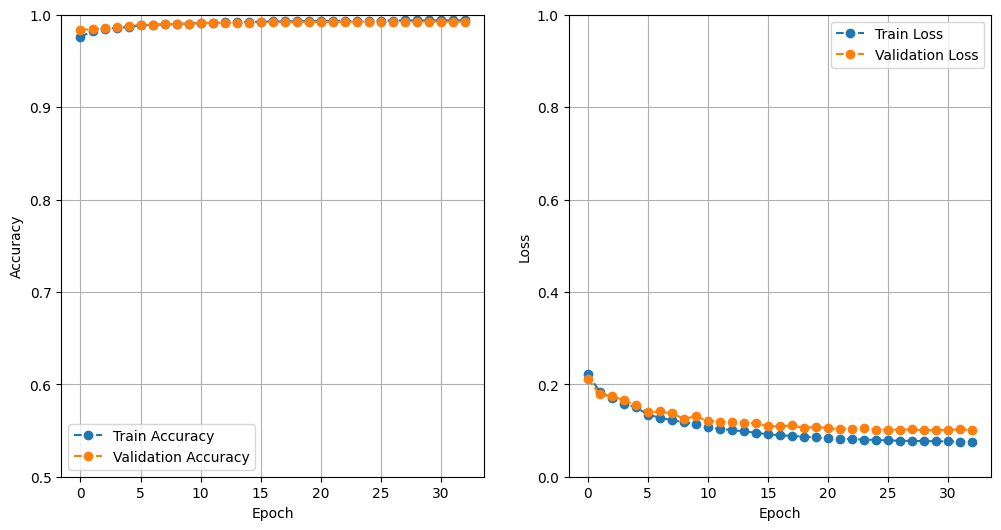

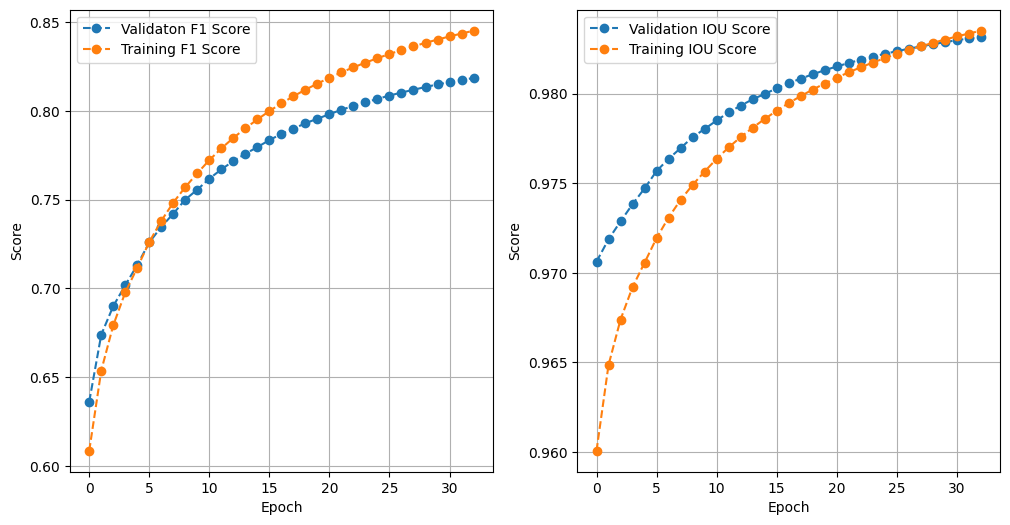

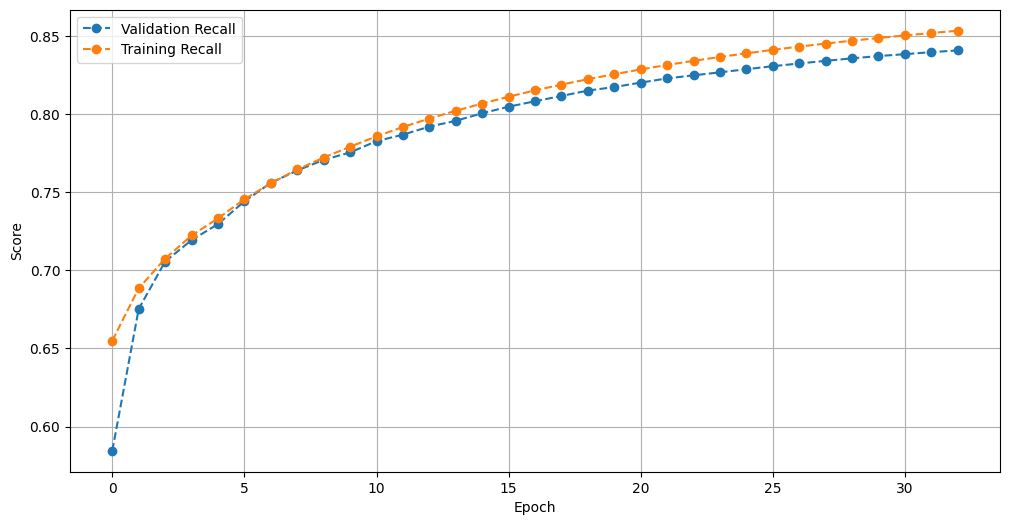

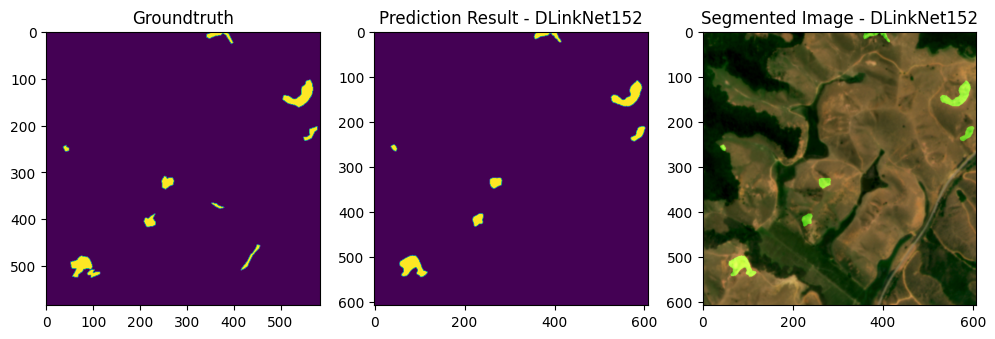

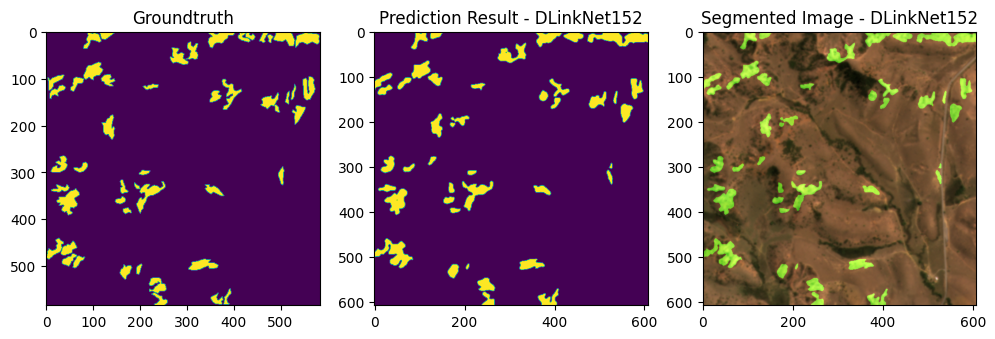

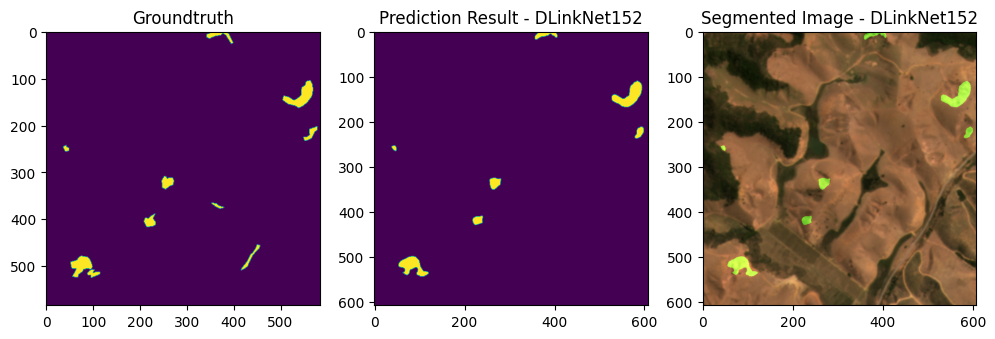

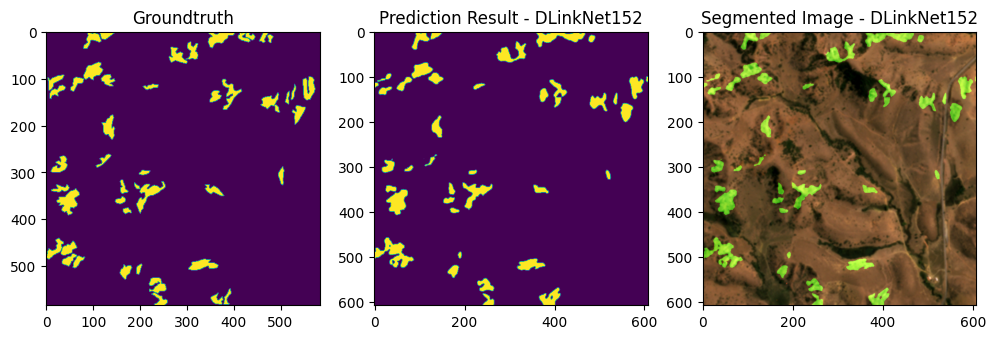

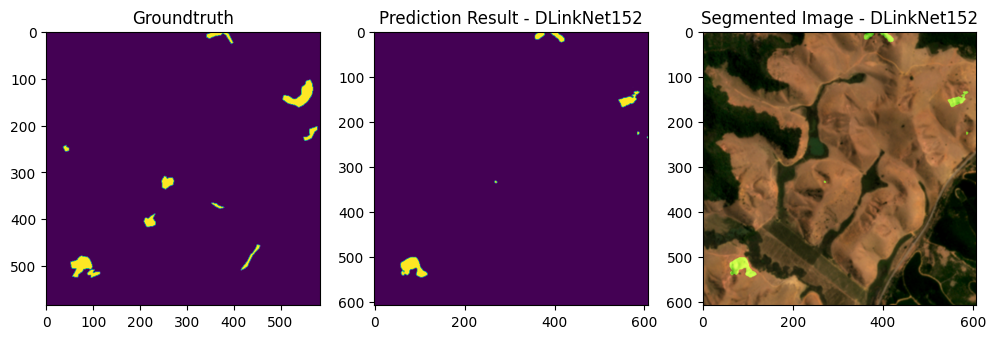

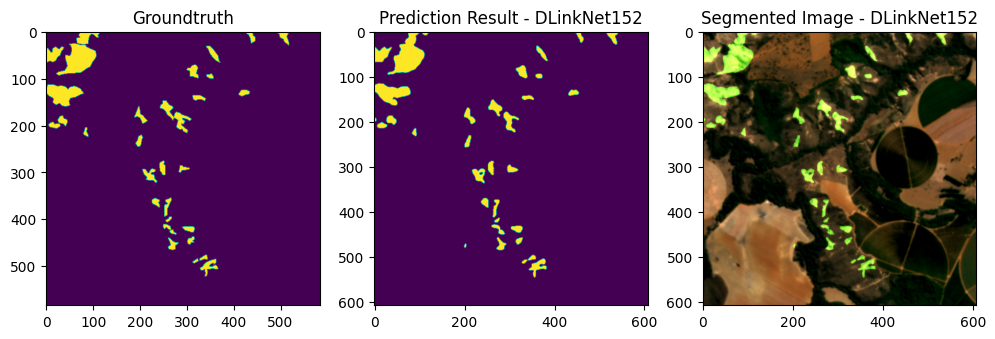

In [ ]:
# %%

if model_loading:
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

if model_training:
    train(
        model,
        training_generator,
        validation_generator,
        loss_func=BCEIoULoss(),
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=3,
    )

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)